In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
data = "../data/customer_churn_dataset.csv"

## Información de los datos

In [39]:
df = pd.read_csv(data)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


- **CustomerID:** Código de identificación del cliente
- **Age:** Edad del cliente (en años)
- **Gender:** Género del cliente (Masculino/Femenino)
- **Tenure:** El período de tiempo que el cliente utiliza el servicio (en meses)
- **Usage Frequency:** La frecuencia con la que el cliente utiliza el servicio (en meses)
- **Support Calls:** Frecuencia de llamadas del cliente al servicio de atención
- **Payment Delay:** El período de retraso en el pago de las facturas del servicio por parte de los clientes (en meses)
- **Subscription Type:** El tipo de servicio seleccionado por el cliente (Básico/Estándar/Premium)
- **Contract Length:** El período de contrato del servicio seleccionado por el cliente (Mensual/Trimestral/Anual)
- **Total Spend:** Dinero total gastado por el cliente en el servicio (en USD)
- **Last Interaction:** El período de tiempo desde el último uso del cliente hasta el presente (en meses)
- **Churn:** El estado actual del cliente, continúa con el servicio (0) o lo abandona (1)

## Preprocesamiento de datos

In [40]:
# Permite conocer las dimensiones del DataFrame
df.shape

(64374, 12)

In [41]:
# Para ver la información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [42]:
# Verificar si hay duplicados
df.duplicated().sum()

np.int64(0)

In [43]:
# Verificar si hay datos faltantes
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [44]:
# CustomerID es solo un identificador, no aporta información predictiva
df = df.drop('CustomerID', axis=1)

In [45]:
# Lista de las columnas
df.columns.tolist()

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [46]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [47]:
# Imprimiendo los valores únicos en todas las columnas menos las numericas.

caracteristicas_numericas = ['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction', 
 'Churn']

for col in df.columns:
    if col not in caracteristicas_numericas:
        print(col, df[col].unique())
        print("-" * 70)

Gender ['Female' 'Male']
----------------------------------------------------------------------
Subscription Type ['Basic' 'Standard' 'Premium']
----------------------------------------------------------------------
Contract Length ['Monthly' 'Annual' 'Quarterly']
----------------------------------------------------------------------


## EDA (Análisis Exploratorio de Datos)

In [48]:

# Informacion de los datos numericos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,64374.0,41.970982,13.924911,18.0,30.0,42.0,54.0,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.0,33.0,47.0,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.0,15.0,23.0,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.0,6.0,8.0,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.0,19.0,25.0,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.0,534.0,768.0,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.0,15.0,23.0,30.0
Churn,64374.0,0.473685,0.499311,0.0,0.0,0.0,1.0,1.0


/tmp/ipykernel_8064/2423238704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn',data=df, palette='magma')
/tmp/ipykernel_8064/2423238704.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Se queda', 'Se va'])


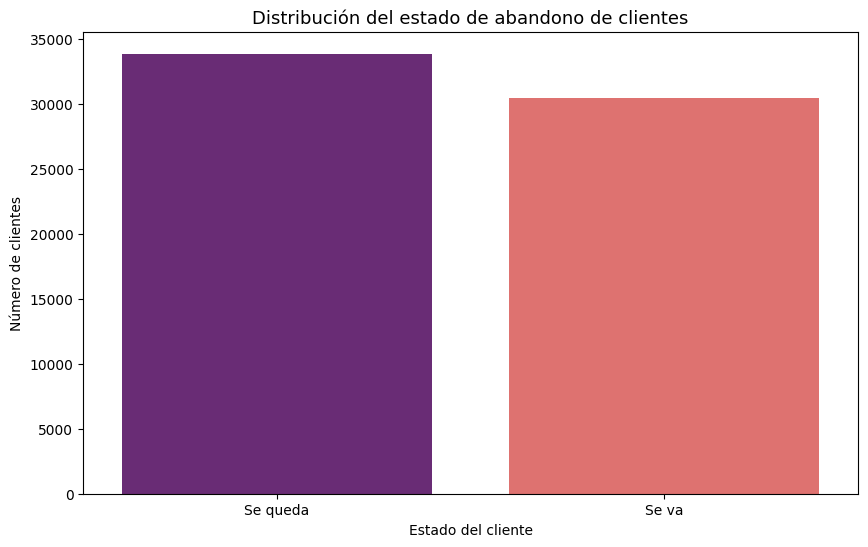

Distribución porcentual de Churn:
Churn
Se queda    52.631497
Se va       47.368503
Name: proportion, dtype: float64


In [49]:
# Información del estado actual del cliente
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Churn',data=df, palette='magma')

ax.set_title('Distribución del estado de abandono de clientes', fontsize=13)
ax.set_xlabel('Estado del cliente')
ax.set_ylabel('Número de clientes')

ax.set_xticklabels(['Se queda', 'Se va'])

plt.show()

churn_pct = df['Churn'].value_counts(normalize=True) * 100
print('Distribución porcentual de Churn:')
print(churn_pct.rename({0: 'Se queda', 1: 'Se va'}))


El resultado muestra que tenemos un 52.6% de clientes que permanecen y un 47.4% que se van.

/tmp/ipykernel_8064/4016211333.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Churn', y='Age', palette='viridis')
/tmp/ipykernel_8064/4016211333.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Se quedan', 'Se van'])


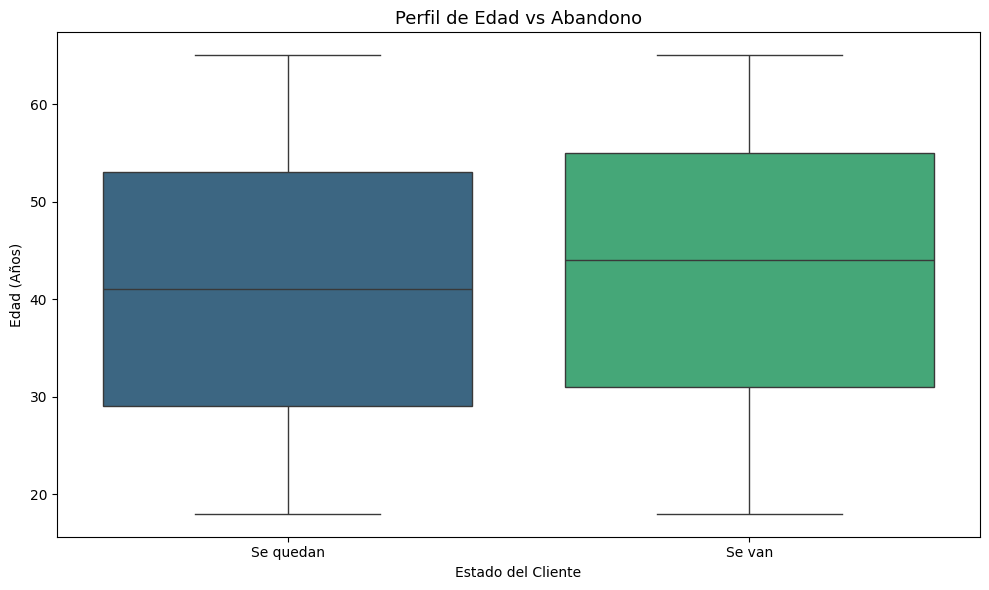

In [50]:
# Información del estado actual del cliente
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Churn', y='Age', palette='viridis')

ax.set_title('Perfil de Edad vs Abandono', fontsize=13)
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Edad (Años)')
ax.set_xticklabels(['Se quedan', 'Se van'])

plt.tight_layout()
plt.show()

El análisis muestra que los clientes que abandonan el servicio presentan una mediana de edad ligeramente superior a la de los clientes retenidos. Sin embargo, existe un alto solapamiento entre ambos grupos, lo que sugiere que la edad, aunque relevante, no es un factor determinante único del abandono.

/tmp/ipykernel_8064/6286104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Churn', y='Support Calls', palette='magma')
/tmp/ipykernel_8064/6286104.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Se quedan', 'Se van'])


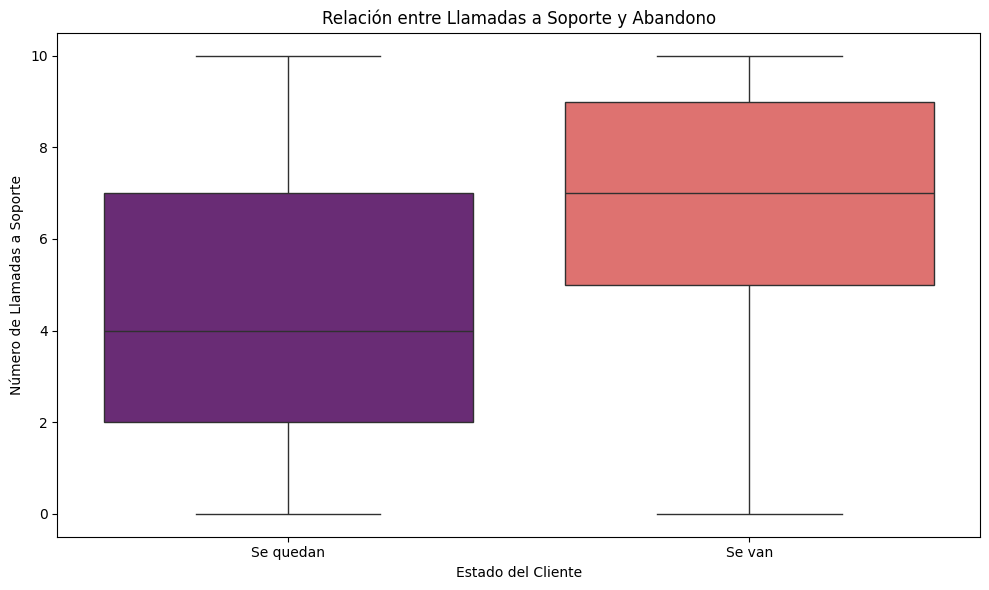

In [51]:
# Número de llamadas a soporte según el estado del cliente
plt.figure(figsize=(10, 6))

ax = sns.boxplot(data=df, x='Churn', y='Support Calls', palette='magma')
plt.title('Relación entre Llamadas a Soporte y Abandono')
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Número de Llamadas a Soporte')
ax.set_xticklabels(['Se quedan', 'Se van'])

plt.tight_layout()
plt.show()

Los clientes que abandonan el servicio presentan un número significativamente mayor de llamadas a soporte en comparación con los clientes retenidos. Esto sugiere que una mayor interacción con el área de soporte, posiblemente debido a problemas recurrentes o insatisfacción, está asociada con una mayor probabilidad de abandono.

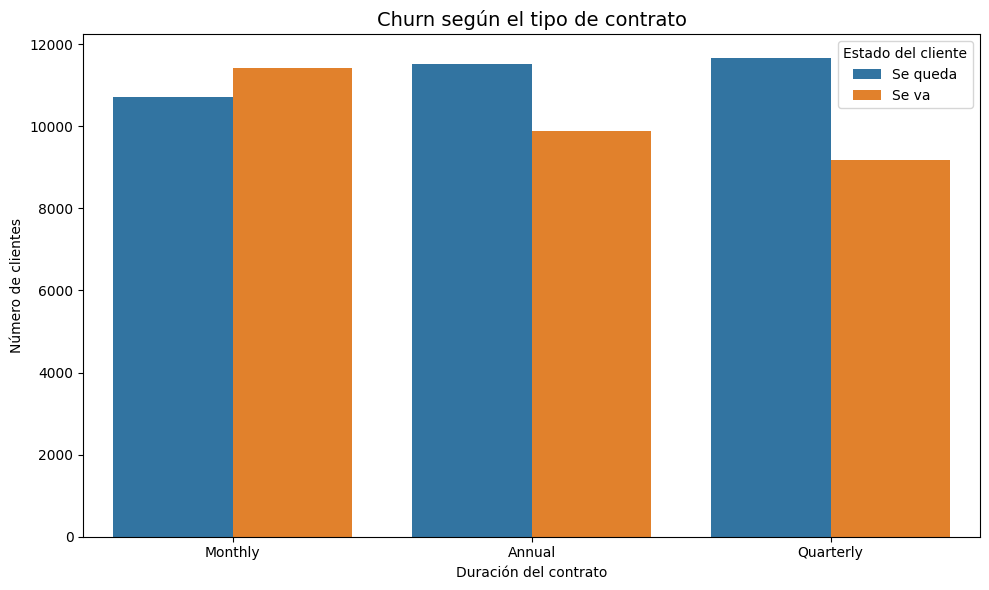

In [52]:
# Tipos de contratos y permanencia
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Contract Length',hue='Churn',data=df)

ax.set_title('Churn según el tipo de contrato', fontsize=14)
ax.set_xlabel('Duración del contrato')
ax.set_ylabel('Número de clientes')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['Se queda', 'Se va'],title='Estado del cliente')

plt.tight_layout()
plt.show()

Como se observa en la gráfica, los contratos Mensuales (Monthly) tienen una proporción de fuga mucho mayor que los Anuales o Trimestrales. De hecho, en el contrato mensual, hay más personas que se van a las que permanecen

## Entrenamiento de modelo

### Transformación de categorías a números

In [53]:
# Crear una copia de seguridad para trabajar el modelado
df_ml = df.copy()

# 1. Transformar Gender (Binario)
gender_map = {'Female': 0, 'Male': 1}
df_ml['Gender'] = df_ml['Gender'].map(gender_map)

# 2. Transformar Subscription Type (Según Jerarquía)
sub_map = {'Basic': 1, 'Standard': 2, 'Premium': 3}
df_ml['Subscription Type'] = df_ml['Subscription Type'].map(sub_map)

# 3. Transformar Contract Length (En meses)
# Esto ayuda al modelo a entender que "Annual" es mucho más tiempo que "Monthly"
contract_map = {'Monthly': 1, 'Quarterly': 3, 'Annual': 12}
df_ml['Contract Length'] = df_ml['Contract Length'].map(contract_map)


In [54]:
# Si hubo algún error en el mapeo, aparecerán nulos. Los eliminamos para no romper el modelo.
nulos_despues = df_ml.isnull().sum().sum()
if nulos_despues > 0:
    print(f"Se encontraron {nulos_despues} valores no reconocidos en el mapeo. Limpiando...")
    df_ml = df_ml.dropna()
else:
    print("No se encontraron valores nulos")

No se encontraron valores nulos


In [55]:
# Verifica que no existan objetos
print(df_ml.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                64374 non-null  int64
 1   Gender             64374 non-null  int64
 2   Tenure             64374 non-null  int64
 3   Usage Frequency    64374 non-null  int64
 4   Support Calls      64374 non-null  int64
 5   Payment Delay      64374 non-null  int64
 6   Subscription Type  64374 non-null  int64
 7   Contract Length    64374 non-null  int64
 8   Total Spend        64374 non-null  int64
 9   Last Interaction   64374 non-null  int64
 10  Churn              64374 non-null  int64
dtypes: int64(11)
memory usage: 5.4 MB
None


In [56]:
df_ml.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,1,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,3,12,757,21,0
3,35,1,9,12,5,17,3,3,232,18,0
4,53,0,58,24,9,2,2,12,533,18,0


### Ingeniería de Features

In [57]:
# Feature 1: Urgencia de Soporte (Llamadas por mes de antigüedad)
df_ml['Support_Urgency'] = df_ml['Support Calls'] / (df_ml['Tenure'] + 1)

# Feature 2: Gasto Mensual (Dinero dejado por mes de antigüedad)
df_ml['Monthly_Spend'] = df_ml['Total Spend'] / (df_ml['Tenure'] + 1)

print("Ingeniería de Features completada.")

Ingeniería de Features completada.


In [58]:
df_ml.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Support_Urgency,Monthly_Spend
0,22,0,25,14,4,27,1,1,598,9,1,0.153846,23.000000
1,41,0,28,28,7,13,2,1,584,20,0,0.241379,20.137931
2,47,1,27,10,2,29,3,12,757,21,0,0.071429,27.035714
3,35,1,9,12,5,17,3,3,232,18,0,0.500000,23.200000
4,53,0,58,24,9,2,2,12,533,18,0,0.152542,9.033898


In [59]:
print(df_ml.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                64374 non-null  int64  
 1   Gender             64374 non-null  int64  
 2   Tenure             64374 non-null  int64  
 3   Usage Frequency    64374 non-null  int64  
 4   Support Calls      64374 non-null  int64  
 5   Payment Delay      64374 non-null  int64  
 6   Subscription Type  64374 non-null  int64  
 7   Contract Length    64374 non-null  int64  
 8   Total Spend        64374 non-null  int64  
 9   Last Interaction   64374 non-null  int64  
 10  Churn              64374 non-null  int64  
 11  Support_Urgency    64374 non-null  float64
 12  Monthly_Spend      64374 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 6.4 MB
None


### Grupo de entrenamieto y grupo de prueba

In [60]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Entrenamiento 80%: {X_train.shape[0]} registros")
print(f"Prueba 20%: {X_test.shape[0]} registros")

Entrenamiento 80%: 51499 registros
Prueba 20%: 12875 registros


### Implementación del Modelo

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score

# 1. Creamos el modelo
# n_estimators=100 significa que el bosque tendrá 100 árboles trabajando juntos
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenamos el modelo con nuestros datos de entrenamiento
rf_model.fit(X_train, y_train)

# 3. Ponemos a prueba al modelo pidiéndole que prediga los datos (X_test)
y_pred = rf_model.predict(X_test)

In [62]:
# Ver el puntaje general
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión General del Modelo: {accuracy:.2%}")
print("-" * 40)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

Precisión General del Modelo: 99.83%
----------------------------------------
Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00      6776
       Churn       1.00      1.00      1.00      6099

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



El modelo obtuvo una precisión del 99.83% en el conjunto de prueba. Tanto la precisión como el recall para ambas clases fueron cercanos a 1.00, lo que indica una excelente capacidad de clasificación sin sesgo hacia alguna clase específica.

/tmp/ipykernel_8064/289541800.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=feature_importance_df, palette='magma')


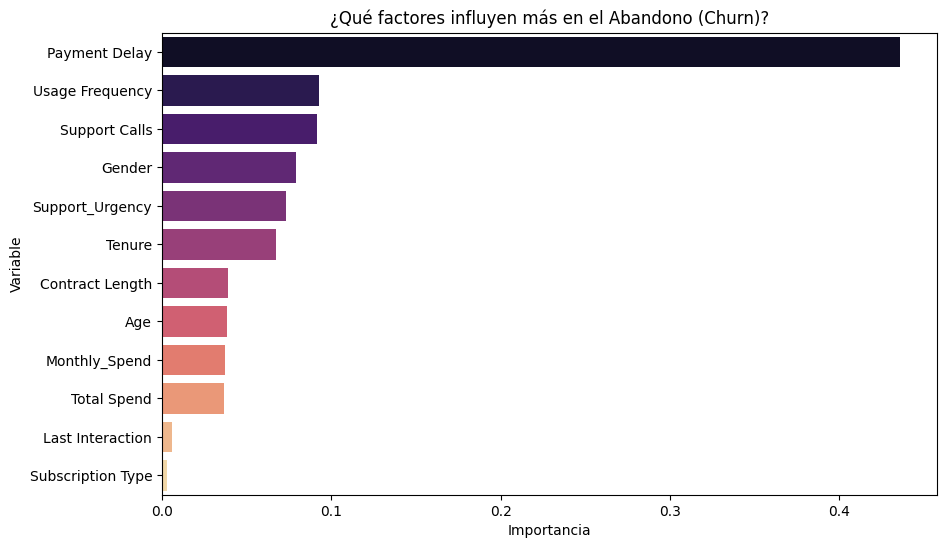

           Variable  Importancia
5     Payment Delay     0.435828
3   Usage Frequency     0.092988
4     Support Calls     0.091520
1            Gender     0.078915
10  Support_Urgency     0.073147


In [63]:
# Graficar la importancia de las variables
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df, palette='magma')
plt.title('¿Qué factores influyen más en el Abandono (Churn)?')
plt.show()

print(feature_importance_df.head(5))

El análisis de importancia de variables muestra que “Payment Delay” es el factor más influyente (43.9%). Esta variables están directamente relacionadas con el comportamiento del cliente, lo que explica el alto desempeño del modelo, con una precisión del 99.93% en el conjunto de prueba. Si el dataset considera que un cliente con más de 30 días de retraso siempre es Churn, el modelo no está "prediciendo", solo está leyendo una regla administrativa.

 ### Identificamos Data Leakage en la variable 'Payment Delay'. Decidimos eliminarla para construir un modelo preventivo en lugar de uno reactivo.

In [64]:
# 1. Creamos un nuevo X eliminando la variable "Payment Delay"
X_filtrado = X.drop('Payment Delay', axis=1)

# Guardamos el orden de las columnas
column_order = X_filtrado.columns.tolist()

# 2. Nueva división
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_filtrado, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Entrenar nuevo modelo
rf_filtrado = RandomForestClassifier(n_estimators=100, random_state=42)
rf_filtrado.fit(X_train_r, y_train_r)

# 4. Ver nueva precisión
y_filtrado = rf_filtrado.predict(X_test_r)

# 5. Evaluación
accuracy_sin_pd = accuracy_score(y_test_r, y_filtrado)
recall_churn = recall_score(y_test_r, y_filtrado, pos_label=1)

print("Orden de columnas del modelo:")
print(column_order)
print("-" * 80)

print("Evaluación del modelo SIN 'Payment Delay'")
print(f"Precisión General: {accuracy_sin_pd:.2%}")
print(f"Recall (Detección de Churn): {recall_churn:.2%}")
print("-" * 40)

print("Reporte de Clasificación:")
print(classification_report(y_test_r, y_filtrado, target_names=["No Churn", "Churn"]))

Orden de columnas del modelo:
['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Support_Urgency', 'Monthly_Spend']
--------------------------------------------------------------------------------
Evaluación del modelo SIN 'Payment Delay'
Precisión General: 78.26%
Recall (Detección de Churn): 89.54%
----------------------------------------
Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.88      0.68      0.77      6776
       Churn       0.72      0.90      0.80      6099

    accuracy                           0.78     12875
   macro avg       0.80      0.79      0.78     12875
weighted avg       0.80      0.78      0.78     12875



Con este nuevo modelo de 78.26%, el sistema puede alertar al equipo de ventas cuando vean que el cliente está llamando mucho a soporte o usa poco la plataforma, antes de que ocurra el impago. 

Destaca especialmente su capacidad para identificar clientes que abandonan el servicio, con un recall del 89.54% para la clase churn. Este comportamiento es deseable en contextos de retención, ya que prioriza la detección de clientes en riesgo, aun a costa de generar algunos falsos positivos.

Con el anterior modelado diría "Este cliente se va" cuando ya es demasiado tarde (cuando ya debe dinero).

### Modelo exportado en formato ONNX 

In [65]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

num_features = X_train_r.shape[1]
initial_type = [('float_input', FloatTensorType([None, num_features]))]

onx = convert_sklearn(rf_filtrado, initial_types=initial_type)

if isinstance(onx, tuple):
    onx = onx[0]

with open("modelo_churn_final.onnx", "wb") as f:
    f.write(onx.SerializeToString())

print(f"Archivo ONNX generado con {num_features} variables. ¡Listo para Java!")

Archivo ONNX generado con 11 variables. ¡Listo para Java!
